# Classification model using Logistic Regression

### 1. Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [32]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_200.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:202 ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
0,1,0.832239,1.233726,1.140988,2.165680,-1.597017,-0.743907,-0.071826,0.116781,-0.635038,...,0.077455,0.066486,2.200836,2.124988,-0.882250,0.367745,1.330217,0.660291,-0.899856,1.536773
1,1,-0.137469,-0.010969,0.843637,0.966030,0.409513,-0.847683,-1.006673,0.749325,-1.147702,...,-0.583738,-1.836914,1.908090,1.263731,-1.759173,-0.579072,1.043836,0.452179,0.771279,1.454416
2,1,-0.405876,0.109203,1.359791,1.225490,-0.138266,-1.679678,0.182724,-0.188638,-1.128553,...,0.342459,-0.801281,2.540216,0.933610,-1.590028,0.056035,1.889005,1.706726,0.912262,1.206671
3,0,-0.376180,0.196114,0.779141,1.123773,0.374653,-0.947631,-0.892223,0.621932,-0.999321,...,-0.272015,-2.344969,2.089854,1.595235,-1.722826,-0.317329,1.074202,0.198977,0.917910,1.435312
4,1,-1.964517,1.128601,-0.194799,-1.433777,-0.143446,-1.161713,-2.380596,0.026122,-1.105232,...,0.160001,-1.498763,2.403551,1.303866,-1.757287,0.949241,0.272723,2.771020,1.826682,1.859360


In [33]:
Y = data.Target # Target column

X = data.iloc[:,1:202] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.832239  1.233726  1.140988  2.165680 -1.597017 -0.743907 -0.071826   
1   -0.137469 -0.010969  0.843637  0.966030  0.409513 -0.847683 -1.006673   
2   -0.405876  0.109203  1.359791  1.225490 -0.138266 -1.679678  0.182724   
3   -0.376180  0.196114  0.779141  1.123773  0.374653 -0.947631 -0.892223   
4   -1.964517  1.128601 -0.194799 -1.433777 -0.143446 -1.161713 -2.380596   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.442013  0.276400  0.702629  0.145038  0.253912 -1.027387 -0.954011   
177  0.122423  0.435671  1.195094  1.099650 -0.651924 -1.125421 -0.957930   
178 -0.338142  0.528099  0.594873  0.742365 -0.105854 -1.069006 -0.974031   
179  0.151963  0.431527  0.093600  0.226152 -0.943175 -1.319361 -1.243683   
180 -0.074435  0.889761  1.095850  0.759461 -0.669753 -0.916490 -0.742355   

            7         8         9  ...       190       191       192  \
0  

### 3. Train-Test dataset split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_train))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 144


### 4. Select the parameters of the model and fit it

In [35]:
param_grid = {'C': [1,2,5,7,10, 11, 12, 13, 14],
            'max_iter':[1000,50000,1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10, 11, 12, 13, 14],
                         'max_iter': [1000, 50000, 1000000],
                         'random_state': [125]})

In [36]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=13, max_iter=1000, random_state=125)

In [37]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5352216748768474


In [38]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0
y_train=y_train.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [39]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0
y_test=y_test.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [40]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:0.9930555555555556
Final accuracy on the testing dataset: 0.5945945945945946


In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[68  0]
 [ 1 75]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]


In [42]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        68
           1       1.00      0.99      0.99        76

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 8  9]
 [ 6 14]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1]


In [44]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.57      0.47      0.52        17
           1       0.61      0.70      0.65        20

    accuracy                           0.59        37
   macro avg       0.59      0.59      0.58        37
weighted avg       0.59      0.59      0.59        37



### 7. Results visualizaton

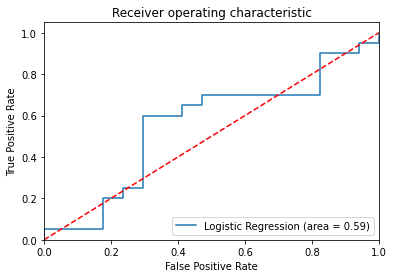

In [45]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()